In [10]:
%matplotlib inline
import pymc3 as pm
from simpanel.glm import Glm
import pandas as pd

In [2]:
data = pd.read_csv('tests/data/testdata.csv')

In [3]:
data.head()

,SOI_1_Ygr,US_gov_yield,REER,GB_USGB,d-unempl-4q,Country
0,0.0,2.128232,-0.016129,4.756667,-0.3,Australia
1,0.0,2.163323,-0.003005,4.886667,0.2,Australia
2,0.0,2.163323,0.005982,4.723333,1.1,Australia
3,0.0,2.128232,-0.057629,4.153333,1.9,Australia
4,0.0,2.079442,-0.055513,3.460000,2.6,Australia


In [4]:
aus = data.ix[data.Country=='Australia', :-1]

In [5]:
aus.head()

,SOI_1_Ygr,US_gov_yield,REER,GB_USGB,d-unempl-4q
0,0.0,2.128232,-0.016129,4.756667,-0.3
1,0.0,2.163323,-0.003005,4.886667,0.2
2,0.0,2.163323,0.005982,4.723333,1.1
3,0.0,2.128232,-0.057629,4.153333,1.9
4,0.0,2.079442,-0.055513,3.460000,2.6


In [6]:
with pm.Model() as model:
    g = Glm.from_xy(aus.iloc[:,1:], aus.iloc[:,0])
    fit = pm.advi()

Applied log-transform to sd and added transformed sd_log_ to model.
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Iteration 0 [0%]: ELBO = -37071.18
Iteration 500 [10%]: Average ELBO = -1272.89
Iteration 1000 [20%]: Average ELBO = -1327.79
Iteration 1500 [30%]: Average ELBO = -745.52
Iteration 2000 [40%]: Average ELBO = -536.83
Iteration 2500 [50%]: Average ELBO = -403.67
Iteration 3000 [60%]: Average ELBO = -317.0
Iteration 3500 [70%]: Average ELBO = -283.59
Iteration 4000 [80%]: Average ELBO = -263.33
Iteration 4500 [90%]: Average ELBO = -239.3
Finished [100%]: Average ELBO = -237.56


In [14]:
g.advifit

ADVIFit(means={'REER': array(-0.024465961503741238), 'sd_log_': array(0.44418748315128603), 'd-unempl-4q': array(-0.001383592772252292), 'GB_USGB': array(-0.008522335274423214), 'US_gov_yield': array(-0.0001203589398966272)}, stds={'REER': 0.99996324327937458, 'sd_log_': 0.48293378946295717, 'd-unempl-4q': 0.47018016603565305, 'GB_USGB': 0.47918098729752923, 'US_gov_yield': 0.50143621926745596}, elbo_vals=array([-335.07903353, -329.78323231, -246.78911246, ..., -235.56935644,
       -228.91665971, -191.61411773]))

In [7]:
with model:
    trace = g.nuts()

100%|██████████| 300/300 [00:25<00:00, 12.46it/s]


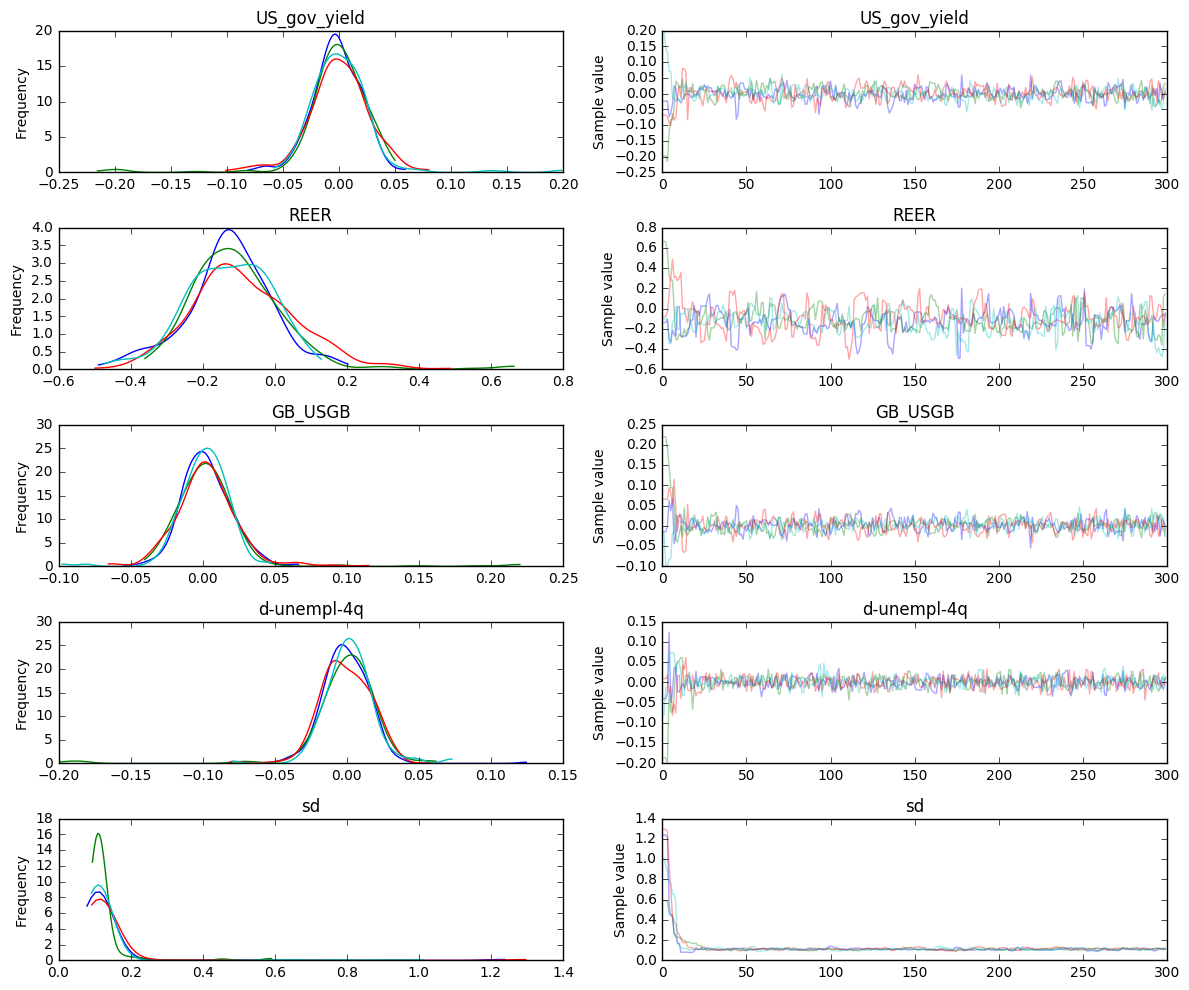

In [12]:
pm.traceplot(trace);

In [13]:
g.trace

<MultiTrace: 4 chains, 300 iterations, 6 variables>